In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.special import gamma as gamma_function

In [0]:
# constant parameters
X_min = 0
X_max = 100
alpha_min = 0.9
alpha_max = 1.0
pa_min = 0.05
pa_max = 0.25
N_nest = 25
N_itertotal = 100

gamma = 0.1          # noise factor
lamda = 1.5          # constant used in le'vy flight

In [0]:
# scalable parameters
total_nodes = 100
anchor_percent = 0.1
M = int(anchor_percent*total_nodes) # no. of anchor nodes
N = total_nodes - M # no. of unknown nodes

t_range = 25 # transmission range

In [0]:
# X_anchor = [[33,500],[1000,1000]]

In [0]:
# # distance calculator
# def dist(x1,y1,x2,y2):
#   dist_real = np.power(np.power(x1-x2,2) + np.power(y1-y2,2),0.5)
#   dist_err = dist_real + np.random.normal(0, gamma*dist_real)
#   return dist_real, dist_err

In [0]:
# neighbour anchors calculator
def neighbours(x, y):
  l = []
  for j in range(len(X_anchor)): # for every anchor nodes
    dist_real = np.power((np.power((x - X_anchor[j][0]), 2) + np.power((y - X_anchor[j][1]), 2)), 0.5)
    dist_err = dist_real + np.random.normal(0, (gamma*dist_real))

    if dist_err < t_range:
      l.append(X_anchor[j])
  
  # return len(l),l # returns no. of neighbouring anchors and  their coords as a tuple
  return l # neighbouring anchors coordinates

In [0]:
# l = neighbours(2,3)
# print(l)
# print(len(l))

In [0]:
# step size (alpha)
def alpha(n_iter):
  return alpha_max - ((n_iter/ N_itertotal) * (alpha_max - alpha_min)) # returns step size value

# Le'vy flight function
def levy():
  temp = np.power(((gamma_function(1 + lamda) * np.sin(np.pi * (lamda /2))) / (gamma_function((1 + lamda)/2) * lamda * np.power(2, ((lamda - 1)/2)) )), 1/lamda)
  u = np.random.normal(0, temp)
  v = np.random.normal(0,1)
  r = u / (np.power(abs(v), (1/lamda)))

  return r  # random walk value


In [0]:
# location limit tester
def limiter(x,y):
  if x > X_max and y > X_max:
    x,y = X_max, X_max
    # X_j = X_rand
  elif x > X_max and X_min < y < X_max:
    x,y = X_max, y
    # X_j = X_rand
  elif x > X_max and y < X_min:
    x,y = X_max, X_min
    # X_j = X_rand
  elif X_min < x < X_max and y < X_min:
    x,y = x, X_min
    # X_j = X_rand
  elif x < X_min and y < X_min:
    x,y = X_min, X_min
    # X_j = X_rand
  elif x < X_min and X_min < y < X_max:
    x,y = X_min, y
    # X_j = X_rand
  elif x < X_min and y > X_max:
    x,y = X_min, X_max
    # X_j = X_rand
  elif X_min < x < X_max and y > X_max:
    x,y = x, X_max
    # X_j = X_rand
  
  return x,y

In [0]:
# print(limiter(0,0))
# print(limiter(100,0))
# print(limiter(0,100))
# print(limiter(100,100))
# print(limiter(22,55))
# print(limiter(150,150))
# print(limiter(150,25))
# print(limiter(151,-40))
# print(limiter(34,-60))
# print(limiter(-32,-45))
# print(limiter(-70,22))
# print(limiter(-70,120))
# print(limiter(24,155))

# v = limiter(24,155)
# v = np.array(v)
# print(v[0])

In [0]:
# objective function (to minimize)
def objective(x,y):
  l = neighbours(x,y)
  if len(l) >= 3:
    m = len(l)
    rerror = []
    for ancn in l:
      dist_real = np.power((np.power((x - ancn[0]), 2) + np.power((y - ancn[1]), 2)), 0.5)
      dist_err = dist_real + np.random.normal(0, (gamma*dist_real))
      rerror.append(np.power(dist_real - dist_err,2))
    
    return np.sum(rerror)/m or None # mean of square of ranging error


In [0]:
# X_anchor = [[29,68],[16,79],[45,57]]
# neighbours(38,81)
# v = objective(38,81)
# print(v)

In [0]:
# # average localization error (ALE)
# def ale():
#   ans =

In [0]:
# localization success ratio (LSR)
def lsr(x,y):
  ans = (x/y) * 100

  return ans

In [0]:
# # modified CS algorithm (paper)
# def mod_cs():
#   X_nest = []
#   for i in range(N_nest):
#     x_nest = np.random.randint(100)
#     y_nest = np.random.randint(100)

#     X_nest.append([x_nest, y_nest])

#   Obj_X_nest = []
#   for i in range(len(X_nest)):
#     Obj_X_nest.append(objective(X_nest[i][0],X_nest[i][1]))
#   # print(Obj_X_nest)

#   N_iter = 1
#   while (N_iter < N_itertotal):
#     X_js = []
#     for i in range(len(X_nest)):
#       X_j = X_nest[i]
#       X_j[0] = X_nest[i][0] + alpha(N_iter) * levy()
#       X_j[1] = X_nest[i][1] + alpha(N_iter) * levy()

#       v = limiter(X_j[0],X_j[1])
#       X_j[0] = v[0]
#       X_j[1] = v[1]

#       F_j = objective(X_j[0],X_j[1]) or 0
#       rand_k = np.random.randint(0, len(X_nest))
#       F_k = objective(X_nest[rand_k][0], X_nest[rand_k][1]) or 0

#       if F_j > F_k:
#         X_j[0] = X_nest[rand_k][0]
#         X_j[1] = X_nest[rand_k][1]
#         F_j = F_k

#       X_js.append(X_j)
#       # X_js = np.array(X_js)
#       # print(X_js)
#       # break

#     # Fitness values of current iteration's solutions
#     Obj_X_js = []
#     for i in range(len(X_js)):
#       Obj_X_js.append(objective(X_js[i][0], X_js[i][1]))
    
#     # Best solution selection
#     Obj_X_js = np.array([np.inf if i is None else i for i in Obj_X_js])
#     F_min = Obj_X_js[np.argmin(Obj_X_js)]
#     best_sol = X_js[np.argmin(Obj_X_js)]

#     # Mutation probability
#     Pa_j = []
#     for i in Obj_X_js:
#       K = i - F_min
#       if K < 1:
#         Pa_j.append(pa_min + (pa_max - pa_min) * K)
#       else:
#         Pa_j.append(pa_max / N_iter)

#     # New random solutions generation according to mutation probability
#     for i in range(len(Pa_j)):
#       rand_temp = np.random.uniform(0, 1)
#       if rand_temp < Pa_j[i]:
#         my_x = np.random.randint(100)
#         my_y = np.random.randint(100)
#         X_js[i] = [my_x, my_y]

#         v = limiter(X_js[i][0],X_js[i][1])
#         X_js[i][0] = v[0]
#         X_js[i][1] = v[1]

#         Obj_X_js[i] = objective(X_js[i][0],X_js[i][1])

#     # Rank all solutions (and find current best)
#     Obj_X_js = np.array([np.inf if i is None else i for i in Obj_X_js])
#     F_min = Obj_X_js[np.argmin(Obj_X_js)]
#     best_sol = X_js[np.argmin(Obj_X_js)]


#     X_js = np.array(X_js)
#     X_nest = X_js
#     # print([X_js, Obj_X_js, best_sol, X_])
#     # print(best_sol)
    
#     N_iter += 1
#   return best_sol


In [82]:
X_unknown = [20,5]
X_anchor = [[13, 14],[40, 77],[81, 90],[8, 23],[25, 98],[17, 56],[99, 9],[30, 22],[9, 52],[2, 65]]
loc = neighbours(X_unknown[0],X_unknown[1])
if len(loc) >= 3:
  X_anchor = loc

  X_nest = []
  for i in range(N_nest):
    x_nest = np.random.randint(100)
    y_nest = np.random.randint(100)

    X_nest.append([x_nest, y_nest])
  print(X_nest)
  # print(N_nest)

  Obj_X_nest = []
  for i in range(len(X_nest)):
    Obj_X_nest.append(objective(X_nest[i][0],X_nest[i][1]))
  print(Obj_X_nest)
  # print(X_anchor)

N_iter = 1
while (N_iter < N_itertotal):
  X_js = []
  for i in range(len(X_nest)):
    X_j = X_nest[i]
    X_j[0] = X_nest[i][0] + alpha(N_iter) * levy()
    X_j[1] = X_nest[i][1] + alpha(N_iter) * levy()

    v = limiter(X_j[0],X_j[1])
    X_j[0] = v[0]
    X_j[1] = v[1]

    F_j = objective(X_j[0],X_j[1]) or np.inf
    rand_k = np.random.randint(0, len(X_nest))
    F_k = objective(X_nest[rand_k][0], X_nest[rand_k][1]) or np.inf

    if F_j > F_k:
      X_j[0] = X_nest[rand_k][0]
      X_j[1] = X_nest[rand_k][1]
      F_j = F_k

    X_js.append(X_j)
  
  # print(X_js)

  # Fitness values of current iteration's solutions
  Obj_X_js = []
  for i in range(len(X_js)):
    Obj_X_js.append(objective(X_js[i][0], X_js[i][1]))
  print(Obj_X_js)
  
  # Current global optimal fitness (F_min)
  Obj_X_js = np.array([np.inf if i is None else i for i in Obj_X_js])
  F_min = Obj_X_js[np.argmin(Obj_X_js)]
  best_sol = X_js[np.argmin(Obj_X_js)]

  break

[[40, 6], [48, 71], [51, 36], [11, 5], [86, 61], [67, 28], [22, 17], [14, 91], [10, 77], [26, 44], [50, 65], [2, 21], [8, 62], [28, 98], [96, 49], [68, 65], [2, 22], [91, 89], [55, 4], [4, 27], [69, 3], [80, 70], [39, 0], [57, 48], [18, 2]]
[None, None, None, None, None, None, 1.0015074829454809, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None]
[None, None, None, 1.2766765023306124, None, None, 3.343339221495229, 1.9389847853135802, None, None, 3.4110629392541028, None, None, None, None, None, None, None, None, 1.3671119108778378, None, None, None, None, None]


In [83]:
loc

[[13, 14], [8, 23], [30, 22]]

In [84]:
print(X_nest)
print(X_js)

[[41.05136599708606, 6.6380427011285486], [45.486711201634414, 71.20952147764783], [50.738096184627544, 38.33629202518598], [11.35146845810495, 7.779225522837352], [85.40900157103988, 72.59305592724144], [68.47716038274619, 26.235765009377452], [18.875572825464765, 17.64089589631314], [11.35146845810495, 7.779225522837352], [9.852002019941732, 77.21843240036875], [26.37308651063341, 45.84634655892503], [11.35146845810495, 7.779225522837352], [1.5001244933227484, 20.952296878768042], [8.17444681568719, 62.04002914242072], [28.156764053932463, 97.36100230005722], [94.47619851807433, 46.819516149143006], [2, 22], [2.275264045543992, 22.388931081915505], [90.43826426891249, 90.15507938479563], [54.044882505926324, 1.7900582761722736], [4.719941435727479, 26.318818831469667], [69.25088518004138, 2.7700498297728577], [79.74051233755374, 69.91956761559574], [39.71064574974668, 1.163973705066688], [56.094197833872315, 48.903041268815386], [22.3040905714873, 1.3965807773286414]]
[[41.0513659970

In [85]:
print('X_nest = ', X_nest)
print('Obj_X_nest = ', Obj_X_nest)
print('iteration check index = ', rand_k)
print('X_js = ', X_js)
print('Obj_X_js = ', Obj_X_js)
print('np.argmin(Obj_X_js) = ', np.argmin(Obj_X_js))
print('F_min = ', F_min)
print('best_sol = ', best_sol)

X_nest =  [[41.05136599708606, 6.6380427011285486], [45.486711201634414, 71.20952147764783], [50.738096184627544, 38.33629202518598], [11.35146845810495, 7.779225522837352], [85.40900157103988, 72.59305592724144], [68.47716038274619, 26.235765009377452], [18.875572825464765, 17.64089589631314], [11.35146845810495, 7.779225522837352], [9.852002019941732, 77.21843240036875], [26.37308651063341, 45.84634655892503], [11.35146845810495, 7.779225522837352], [1.5001244933227484, 20.952296878768042], [8.17444681568719, 62.04002914242072], [28.156764053932463, 97.36100230005722], [94.47619851807433, 46.819516149143006], [2, 22], [2.275264045543992, 22.388931081915505], [90.43826426891249, 90.15507938479563], [54.044882505926324, 1.7900582761722736], [4.719941435727479, 26.318818831469667], [69.25088518004138, 2.7700498297728577], [79.74051233755374, 69.91956761559574], [39.71064574974668, 1.163973705066688], [56.094197833872315, 48.903041268815386], [22.3040905714873, 1.3965807773286414]]
Obj_X

### MAIN

In [0]:
# anchor nodes random placement
X_anchor = []

for i in range(M):
  x_anchor = np.random.randint(100)
  y_anchor = np.random.randint(100)

  X_anchor.append([x_anchor, y_anchor])

In [18]:
X_anchor

[[13, 14],
 [40, 77],
 [81, 90],
 [8, 23],
 [25, 98],
 [17, 56],
 [99, 9],
 [30, 22],
 [9, 52],
 [2, 65]]

In [0]:
# unknown nodes random placement
X_unknown = []

for i in range(N):
  x_unknown = np.random.randint(100)
  y_unknown = np.random.randint(100)

  X_unknown.append([x_unknown, y_unknown])

In [52]:
X_unknown

array([[41, 54],
       [49, 38],
       [ 3, 73],
       [98, 10],
       [58, 36],
       [42, 77],
       [52, 30],
       [86, 55],
       [79, 35],
       [63, 12],
       [78, 71],
       [57, 72],
       [58, 52],
       [20,  5],
       [86, 52],
       [99, 88],
       [44, 79],
       [89, 89],
       [64, 36],
       [45,  6],
       [16, 14],
       [97, 27],
       [79, 42],
       [34, 44],
       [79, 47],
       [64, 26],
       [ 3,  0],
       [45, 52],
       [69, 24],
       [86, 15],
       [24, 29],
       [80, 32],
       [68, 41],
       [91, 35],
       [48, 93],
       [77, 73],
       [69,  1],
       [72, 74],
       [12, 74],
       [28, 34],
       [22, 45],
       [22, 95],
       [91, 29],
       [ 1, 55],
       [53, 60],
       [14,  1],
       [25, 91],
       [95, 15],
       [15, 78],
       [58, 44],
       [61,  8],
       [ 3,  0],
       [ 7, 53],
       [ 9, 25],
       [77,  1],
       [12, 38],
       [84, 37],
       [45, 34],
       [58, 70

In [0]:
X_unknown = np.array(X_unknown)
X_anchor = np.array(X_anchor)

In [21]:
X_anchor

array([[13, 14],
       [40, 77],
       [81, 90],
       [ 8, 23],
       [25, 98],
       [17, 56],
       [99,  9],
       [30, 22],
       [ 9, 52],
       [ 2, 65]])

In [0]:
# back up of original anchors and unknowns
X_anchor_og = X_anchor.copy()
X_unknown_og = X_unknown.copy()

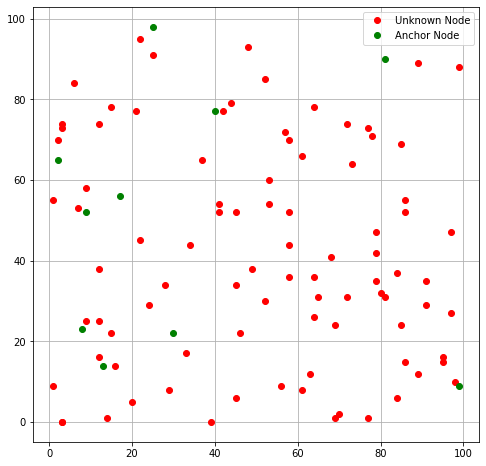

In [23]:
plt.figure(figsize=(8, 8))
plt.plot(X_unknown[:, 0], X_unknown[:, 1], 'ro', label="Unknown Node")
plt.plot(X_anchor[:, 0], X_anchor[:, 1], 'go', label="Anchor Node")
plt.legend()
plt.grid()
plt.show()

In [24]:
X_obj = []
for i in range(len(X_unknown)):
  X_obj.append(objective(X_unknown[i][0],X_unknown[i][1]))
print(X_obj)

[None, None, None, None, None, None, None, None, None, None, None, None, None, 2.0994454549361805, None, None, None, None, None, None, 0.1356556097860161, None, None, None, None, None, None, None, None, None, 5.71878728650088, None, None, None, None, None, None, None, 0.5557695503343547, None, 2.4421017358585035, None, None, 1.5593049493038158, None, None, None, None, 3.162544109540995, None, None, None, 0.5657843502862444, 0.017334825348504643, None, 1.366013314078069, None, None, None, None, None, None, None, 6.341855186187773, None, None, None, None, None, None, 0.4497543261390295, None, 0.16387365676050966, None, None, 0.8558641689065376, None, None, None, None, None, None, None, None, None, 0.7887500996702707, None, 1.1167474671663962, 6.486524059701597, 3.293465859843644]


In [25]:
not_possible = 0
for i in range(len(X_obj)):
  if X_obj[i] == None:
    not_possible += 1

print(not_possible)

72


In [0]:
for i in range(len(X_unknown)):
  loc = neighbours(X_unknown[i][0],X_unknown[i][1])
  if len(loc) >= 3:
    X_anchor = loc
    f_start = objective(X_unknown[i][0],X_unknown[i][1])

    # call modified CS algorithm
    v = mod_cs()
    print(X_unknown[i])
    print(f_start)
    print(X_anchor)
    print(v)
    print(objective(v[0],v[1]))
  
  # localize the best solution coordinates
  # remove the current node [i] from "unknown list", and add best_sol [i] to "anchor list"

  break

In [35]:
v

NameError: ignored

In [0]:
# X_unknown[i]

In [36]:
print(f_start)
print(X_anchor)

NameError: ignored

In [38]:
ans = objective(1,2)
print(ans)

None


In [39]:
neighbours(1,2)

[array([13, 14]), array([ 8, 23])]